In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For encoding and scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler



Matplotlib is building the font cache; this may take a moment.


In [10]:
import os

folder_path = r'C:\Users\aarve\OneDrive\Desktop\Customer Churn Analysis\Customer-Churn-Analysis-for-a-Telecom-Company-week-1\Week_1_EDA'

# List all files to see the exact name
print(os.listdir(folder_path))


['churn_analysis_week1.ipynb', 'Telco-Customer-Churn.csv', 'visuals']


In [12]:
import pandas as pd

# Load the CSV using raw string format to avoid escape issues
df = pd.read_csv(r'C:\Users\aarve\OneDrive\Desktop\Customer Churn Analysis\Customer-Churn-Analysis-for-a-Telecom-Company-week-1\Week_1_EDA\Telco-Customer-Churn.csv')

# Show first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Check how many missing values are in each column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']


In [17]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
scaler = StandardScaler()


In [22]:
df[numerical_features].dtypes


tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [24]:
df['TotalCharges'].isna().sum()


np.int64(11)

In [25]:
df.dropna(subset=['TotalCharges'], inplace=True)


In [26]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [28]:
# Convert 'Churn' column to numeric (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [29]:
correlation_matrix = df[numerical_features + ['Churn']].corr()
correlation_matrix


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


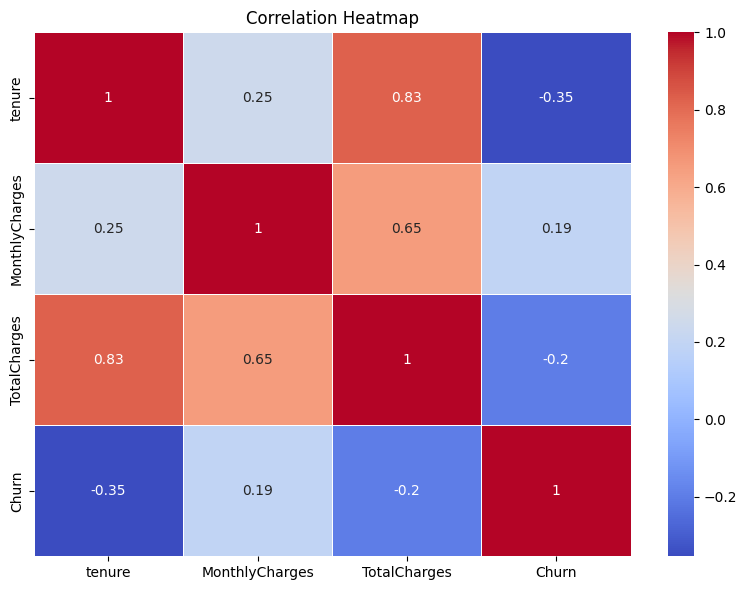

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [31]:
# Select columns with object (text) type
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)


Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])


In [33]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,-1.280248,0,1,0,0,...,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,3953,1,0,0,0,0.064303,1,0,0,2,...,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,2558,1,0,0,0,-1.239504,1,0,0,2,...,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,5524,1,0,0,0,0.512486,0,1,0,2,...,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,6500,0,0,0,0,-1.239504,1,0,1,0,...,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [35]:
import os

# Create the folder if it doesn't exist
os.makedirs('Week_2_Preprocessing', exist_ok=True)


In [36]:
df.to_csv('Week_2_Preprocessing/preprocessed_data.csv', index=False)


In [37]:
df.shape


(7032, 21)

In [38]:
df.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,4843,1,0,1,1,-0.343137,1,2,0,2,...,2,2,2,2,1,1,3,0.664868,-0.129180,0
7039,1524,0,0,1,1,1.612573,1,2,1,0,...,2,0,2,2,1,1,1,1.276493,2.241056,0
7040,3358,0,0,1,1,-0.872808,0,1,0,2,...,0,0,0,0,0,1,2,-1.170004,-0.854514,0
7041,5923,1,1,1,0,-1.158016,1,2,1,0,...,0,0,0,0,0,1,3,0.319168,-0.872095,1
7042,2221,1,0,0,0,1.368109,1,0,1,2,...,2,2,2,2,2,1,0,1.357932,2.012344,0


In [39]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df.dtypes


customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\aarve\OneDrive\Desktop\Customer Churn Analysis\Customer-Churn-Analysis-for-a-Telecom-Company-week-1\Week_2_Preprocessing\Week_2_Preprocessing\preprocessed_data.csv')


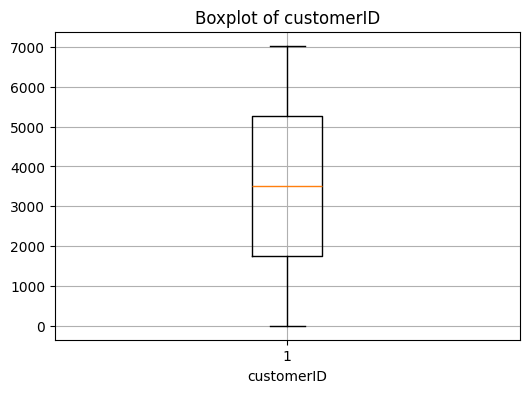

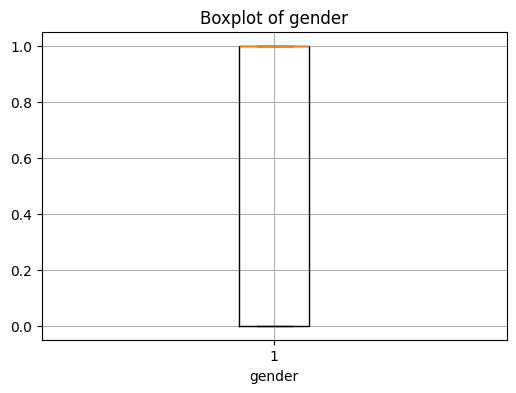

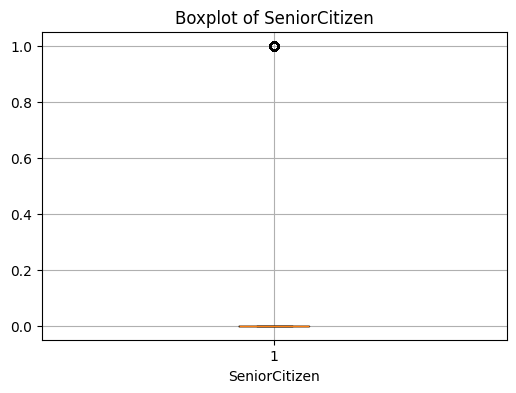

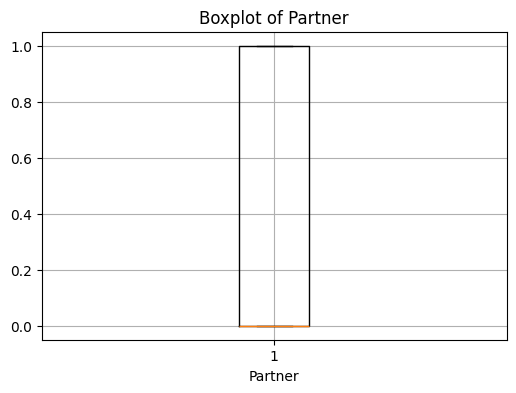

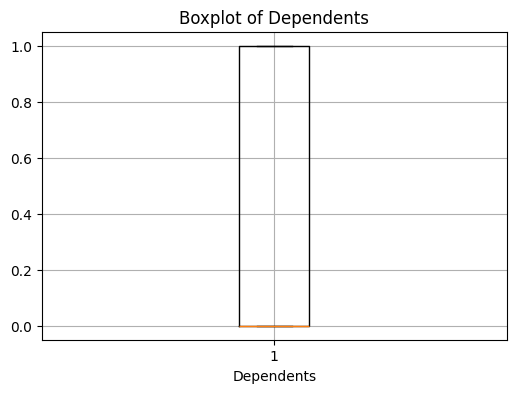

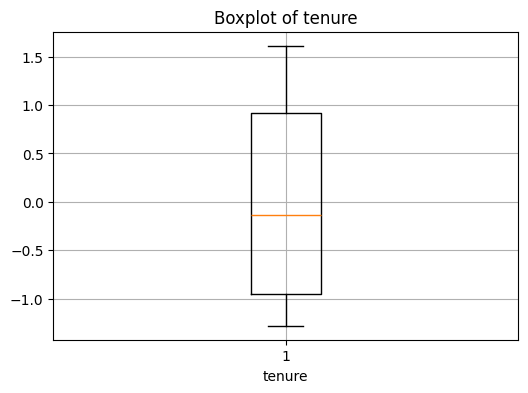

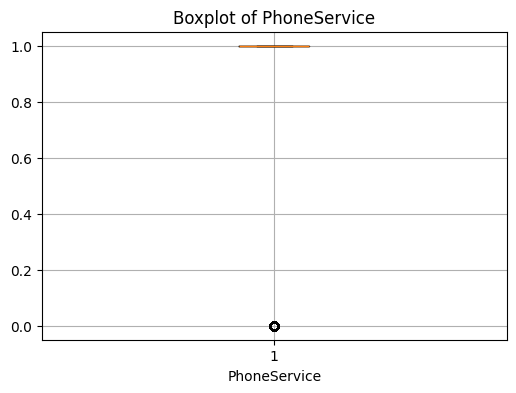

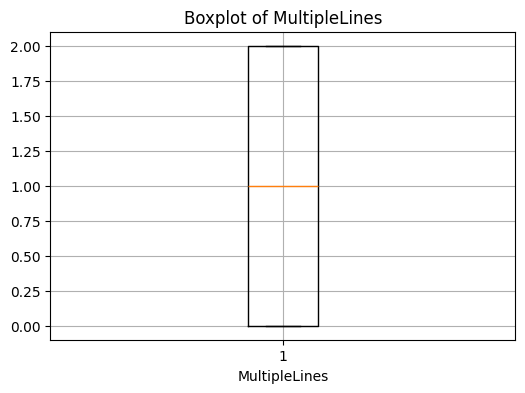

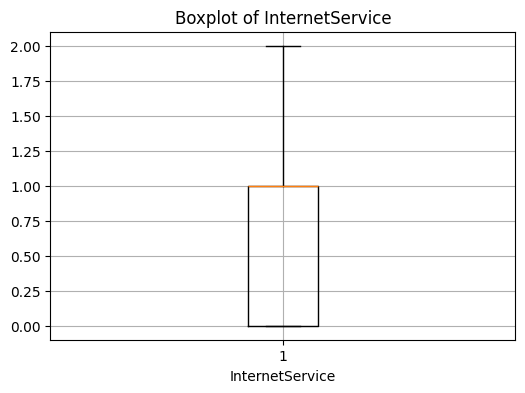

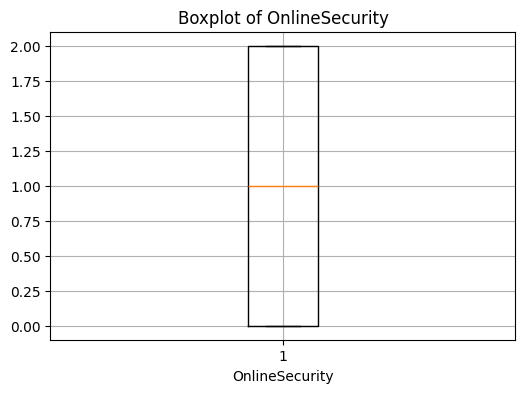

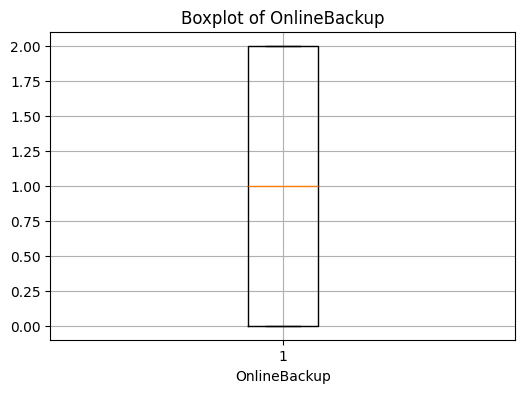

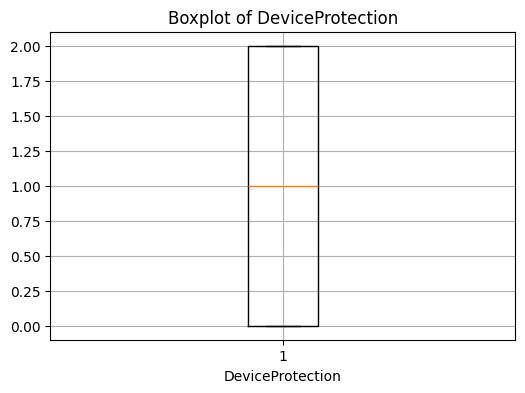

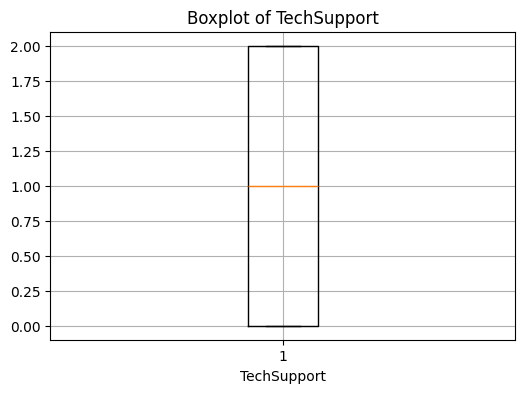

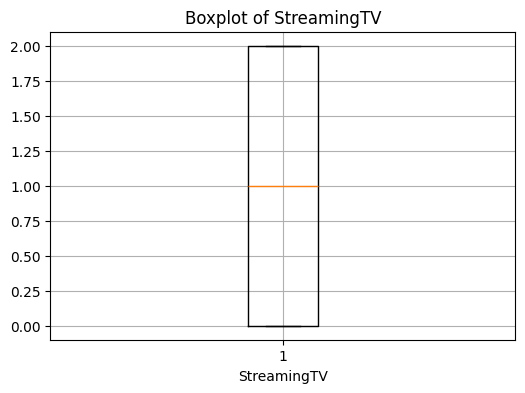

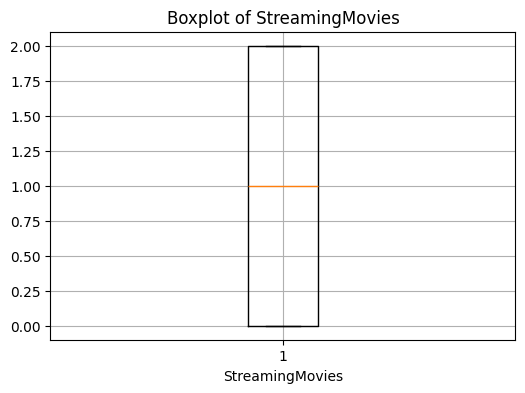

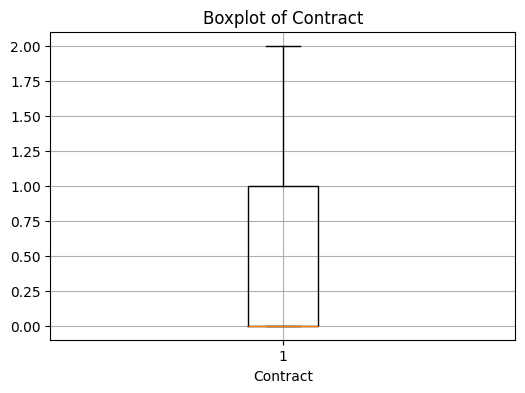

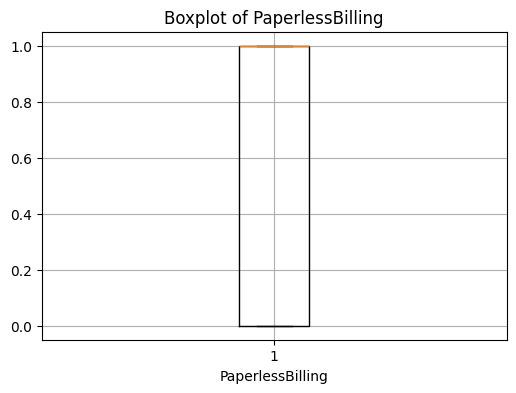

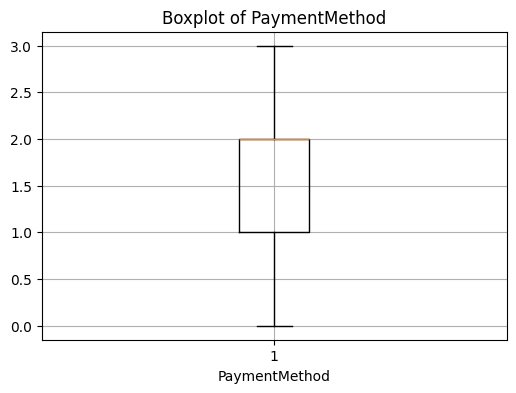

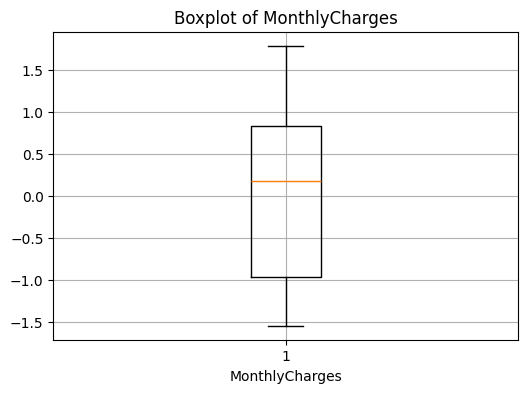

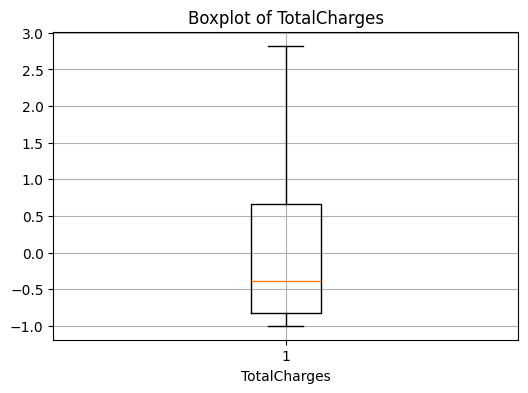

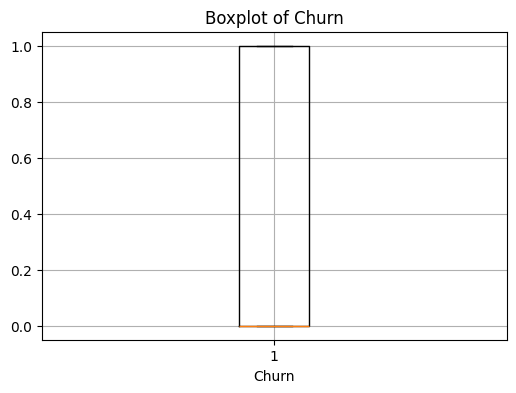

In [9]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Generate boxplots
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [10]:
import numpy as np

def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply IQR treatment to all numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_features:
    df = treat_outliers_iqr(df, col)


In [12]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.1 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.5 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.8 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/11.1 MB 2.0 MB/s eta 0:00:04
   ----------------- ---------------------- 4.7/11.1 MB 2.1 MB/s eta 0:00:04
   ------------------ --------------------- 5.2/11.1 MB 2.1 MB/s eta 0:00:03
   ----------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from imblearn.over_sampling import SMOTE


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Ensure categorical features are encoded (assume they are already from Week 2)

# Split before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
